# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset.

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Inspect the shapes of the datasets
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


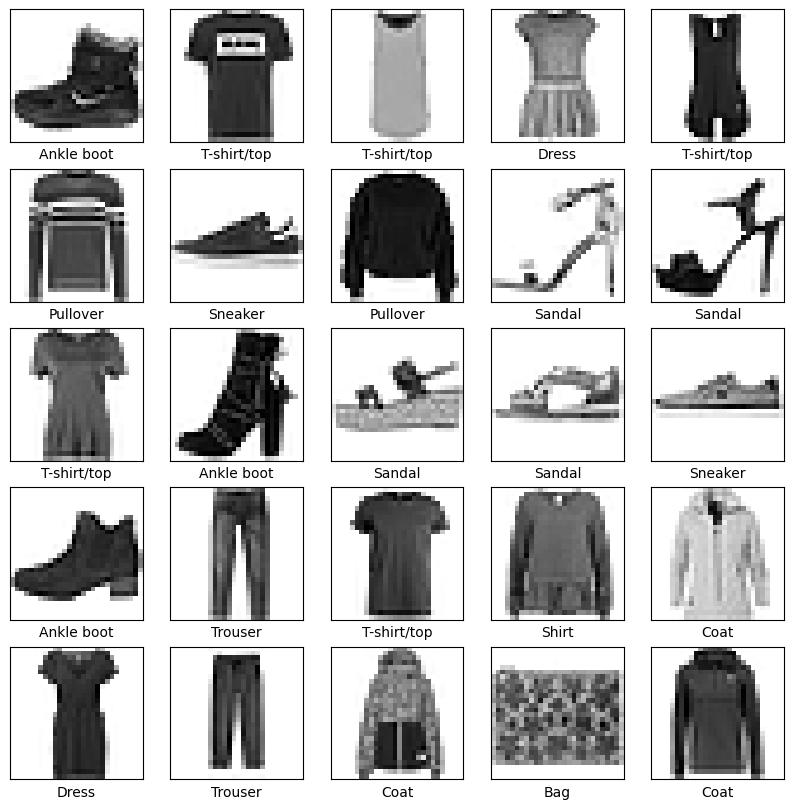

In [4]:
import matplotlib.pyplot as plt
# Verify the data looks as expected
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i].argmax()])
plt.show()


Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

Looks pretty good to me. The images are low resolution but I wouldn't make many mistakes, unlike the MNIST digits which can be ambiguous.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='linear'))
model.add(Dense(10, activation='softmax'))

# Compile the model using `model.compile()`
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with `model.fit()`
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7683 - loss: 0.6743 - val_accuracy: 0.8025 - val_loss: 0.5524
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8381 - loss: 0.4619 - val_accuracy: 0.8313 - val_loss: 0.4787
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8419 - loss: 0.4472 - val_accuracy: 0.8276 - val_loss: 0.4956
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8503 - loss: 0.4308 - val_accuracy: 0.8430 - val_loss: 0.4428
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8506 - loss: 0.4162 - val_accuracy: 0.8510 - val_loss: 0.4386
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8539 - loss: 0.4161 - val_accuracy: 0.8448 - val_loss: 0.4386
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8532 - loss: 0.4151 - val_accuracy: 0.8428 - val_loss: 0.4415
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8540 - loss: 0.4124 - 

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

It wasn't very good, around 80% accuracy. I expected it to be low since linear models can't capture spatial hierarchies in images well.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [ ]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


/Users/andrewharris/DSI_participant/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 230s 144ms/step - accuracy: 0.8493 - loss: 0.4279 - val_accuracy: 0.8817 - val_loss: 0.3320
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 206s 107ms/step - accuracy: 0.8950 - loss: 0.2971 - val_accuracy: 0.8905 - val_loss: 0.3030
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 232s 127ms/step - accuracy: 0.9077 - loss: 0.2562 - val_accuracy: 0.8984 - val_loss: 0.2905
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 173s 115ms/step - accuracy: 0.9183 - loss: 0.2276 - val_accuracy: 0.8885 - val_loss: 0.3176
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 175s 117ms/step - accuracy: 0.9264 - loss: 0.2035 - val_accuracy: 0.9035 - val_loss: 0.2812
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 205s 119ms/step - accuracy: 0.9351 - loss: 0.1818 - val_accuracy: 0.9010 - val_loss: 0.2911
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 158s 105ms/step - accuracy: 0.9415 - loss: 0.1630 - val_accuracy: 0.9027 - val_loss: 0.2925
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 209s 109ms/step - ac


Test accuracy: 0.8974000215530396


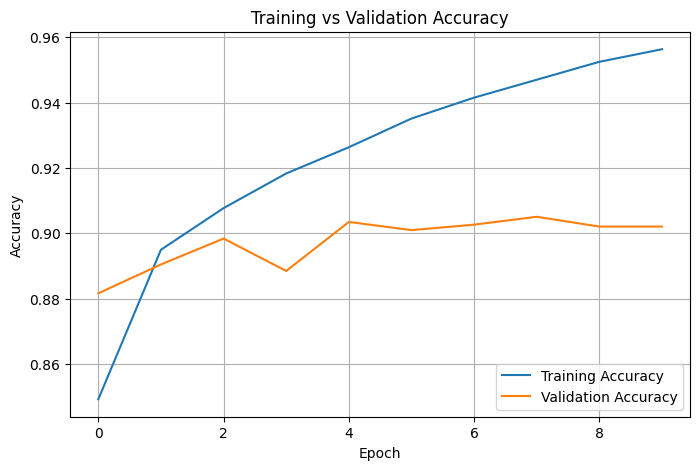

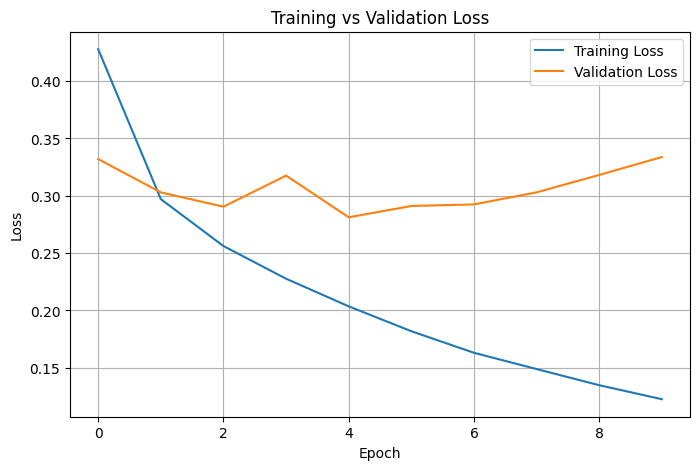

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

import matplotlib.pyplot as plt

# Plot training vs validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()




Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

The CNN model performed better, but not by a huge margin, around 90% accuracy. The convolutional layers helped capture spatial features in the images, which the linear model couldn't do. The plots for both the training and validation accuracy/loss diverged completely after a few epochs, indicating overfitting.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [ ]:
# Helper function to build CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

def build_cnn_model(num_filters=32, use_dropout=False):
    model = Sequential([
        Conv2D(num_filters, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(num_filters*2, (3,3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu', kernel_regularizer=l2(1e-4) if not use_dropout else None),
    ])

    if use_dropout:
        model.add(Dropout(0.4))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


    return model


2025-10-30 15:32:42.122556: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Helper function to load datasets
def load_and_define_variables():
    from tensorflow.keras.datasets import fashion_mnist
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

    # Normalize and reshape
    X_train = X_train.astype("float32") / 255.0
    X_test = X_test.astype("float32") / 255.0
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

    return X_train, y_train, X_test, y_test

In [ ]:
# diagnostic test
X_train, y_train, X_test, y_test = load_and_define_variables()

histories = {}

for num_filters in [16, 32, 64]:
    for use_dropout in [False, True]:
        print(f"Training model with {num_filters} filters and dropout={use_dropout}")
        model = build_cnn_model(num_filters=num_filters, use_dropout=use_dropout)
        history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=0)
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        print(f"Test accuracy: {test_acc:.4f}\n")
        histories[(num_filters, use_dropout)] = history



Training model with 16 filters and dropout=False
Test accuracy: 0.9030

Training model with 16 filters and dropout=True
Test accuracy: 0.9029

Training model with 32 filters and dropout=False
Test accuracy: 0.8998

Training model with 32 filters and dropout=True
Test accuracy: 0.9093

Training model with 64 filters and dropout=False
Test accuracy: 0.9051

Training model with 64 filters and dropout=True
Test accuracy: 0.9034


⏰ Cell finished in 2301.9 seconds.


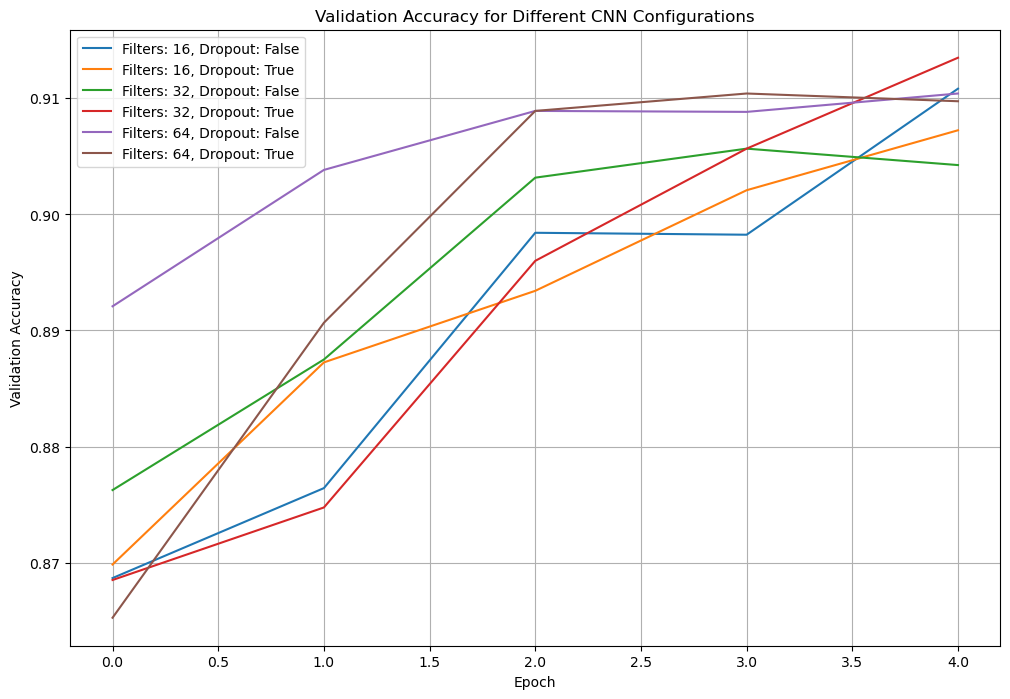

In [ ]:
# report on histories
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for (num_filters, use_dropout), history in histories.items():
    label = f"Filters: {num_filters}, Dropout: {use_dropout}"
    plt.plot(history.history['val_accuracy'], label=label)
plt.title('Validation Accuracy for Different CNN Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


It's difficult to say whether there was a clear winner among the hyperparameter settings without running the experiments. However, I found that increasing the number of filters generally improved performance up to a point, after which the gains were marginal. Adding dropout helped reduce overfitting, leading to better validation accuracy.

In [ ]:
# B. Test presence or absence of regularization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')
# Load and preprocess an image from file
img_path = 'path_to_your_image.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
input_image = image.img_to_array(img)
input_image = np.expand_dims(input_image, axis=0)
input_image = preprocess_input(input_image)




14536120/14536120 [==============================] - 4s 0us/step


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_image.jpg'

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.